#Report Final

- Nguyễn Quốc Tiến - 20280098
- Dương Vi Doanh   - 20280018

#Read data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import copy
import timeit
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [ ]:
path = "/content/sample_data/Banking.csv"
df=pd.read_csv(path)
df_copy=df.copy()

In [ ]:
df

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164304,10164305,"20,725",10+ years,Rent,NaN,VERIFIED - income source,credit_card,13.56,0,NaN,13,16,Male,2
164305,10164306,"6,000",8 years,Own,NaN,VERIFIED - income source,small_business,9.12,0,36.0,13,30,Male,2
164306,10164307,"20,250",10+ years,Mortgage,NaN,VERIFIED - income,credit_card,18.17,1,NaN,17,30,Male,1
164307,10164308,"10,000",4 years,Rent,NaN,not verified,major_purchase,18.75,1,48.0,16,62,Female,3


In [ ]:
df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0.0,NaN,9.0,14.0,Female,1.0
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0.0,17.0,12.0,24.0,Female,3.0
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0.0,NaN,12.0,16.0,Male,3.0
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3.0,NaN,16.0,22.0,Male,3.0
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1.0,NaN,19.0,30.0,Female,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65690 entries, 0 to 65689
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  65690 non-null  int64  
 1   Loan_Amount_Requested    65690 non-null  object 
 2   Length_Employed          62717 non-null  object 
 3   Home_Owner               55412 non-null  object 
 4   Annual_Income            55620 non-null  float64
 5   Income_Verified          65689 non-null  object 
 6   Purpose_Of_Loan          65689 non-null  object 
 7   Debt_To_Income           65689 non-null  float64
 8   Inquiries_Last_6Mo       65689 non-null  float64
 9   Months_Since_Deliquency  30365 non-null  float64
 10  Number_Open_Accounts     65689 non-null  float64
 11  Total_Accounts           65689 non-null  float64
 12  Gender                   65689 non-null  object 
 13  Interest_Rate            65689 non-null  float64
dtypes: float64(7), int64(1

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Loan_ID,65690.0,1.003285e+07,18963.213929,10000001.0,10016423.25,10032845.50,10049267.75,10065690.00
Annual_Income,55620.0,7.285559e+04,47374.923979,4000.0,45000.00,63000.00,88028.00,1950000.00
Debt_To_Income,65689.0,1.722389e+01,7.859053,0.0,11.37,16.81,22.83,39.99
Inquiries_Last_6Mo,65689.0,7.763400e-01,1.030987,0.0,0.00,0.00,1.00,8.00
Months_Since_Deliquency,30365.0,3.419704e+01,21.729937,0.0,16.00,31.00,50.00,141.00
Number_Open_Accounts,65689.0,1.117277e+01,4.970933,0.0,8.00,10.00,14.00,62.00
Total_Accounts,65689.0,2.501985e+01,11.544198,2.0,17.00,23.00,32.00,105.00
Interest_Rate,65689.0,2.157013e+00,0.738268,1.0,2.00,2.00,3.00,3.00


Check missing values

In [ ]:
features_na=[]
for feature in df.columns:
  if df[feature].isnull().sum()>1:
    features_na.append(feature)

In [ ]:
features_na

['Length_Employed', 'Home_Owner', 'Annual_Income', 'Months_Since_Deliquency']

In [ ]:
df.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             2973
Home_Owner                 10278
Annual_Income              10070
Income_Verified                1
Purpose_Of_Loan                1
Debt_To_Income                 1
Inquiries_Last_6Mo             1
Months_Since_Deliquency    35325
Number_Open_Accounts           1
Total_Accounts                 1
Gender                         1
Interest_Rate                  1
dtype: int64

- Length_Employed, Home_Owner, Annual_Income, Months_Since_Deliquency have missing value, may be is NULL, 'Unknow' or 'Eror'

In [ ]:
df.dtypes

Loan_ID                      int64
Loan_Amount_Requested       object
Length_Employed             object
Home_Owner                  object
Annual_Income              float64
Income_Verified             object
Purpose_Of_Loan             object
Debt_To_Income             float64
Inquiries_Last_6Mo         float64
Months_Since_Deliquency    float64
Number_Open_Accounts       float64
Total_Accounts             float64
Gender                      object
Interest_Rate              float64
dtype: object

### PREPROCESSING:

In [ ]:
df.columns

Index(['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'Gender', 'Interest_Rate'],
      dtype='object')

In [ ]:
for i in range(len(df.columns)):
  if(len(df[df.columns[i]].value_counts())<50):
    print(df[df.columns[i]].value_counts())

10+ years    21188
2 years       5841
3 years       5179
< 1 year      5133
5 years       4315
1 year        4175
4 years       3927
7 years       3740
6 years       3633
8 years       3107
9 years       2478
10+              1
Name: Length_Employed, dtype: int64
Mortgage    28157
Rent        22181
Own          5049
Other          20
None            5
Name: Home_Owner, dtype: int64
VERIFIED - income           23725
VERIFIED - income source    21341
not verified                20623
Name: Income_Verified, dtype: int64
debt_consolidation    38834
credit_card           14563
home_improvement       3717
other                  3350
major_purchase         1369
small_business          965
car                     753
medical                 629
moving                  398
vacation                361
wedding                 337
house                   316
renewable_energy         51
educational              46
Name: Purpose_Of_Loan, dtype: int64
0.0    34322
1.0    18556
2.0     7958
3.0     35

In [ ]:
df.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             2973
Home_Owner                 10278
Annual_Income              10070
Income_Verified                1
Purpose_Of_Loan                1
Debt_To_Income                 1
Inquiries_Last_6Mo             1
Months_Since_Deliquency    35325
Number_Open_Accounts           1
Total_Accounts                 1
Gender                         1
Interest_Rate                  1
dtype: int64

In [ ]:
df_pre=df.copy()

In [ ]:
df_pre['Loan_Amount_Requested'].replace(',','', inplace = True, regex = True)
df_pre['Loan_Amount_Requested'] = pd.to_numeric(df_pre['Loan_Amount_Requested'])
df_pre['Loan_Amount_Requested']
df_pre['Loan_Amount_Requested'].replace(',','', inplace = True, regex = True)
df_pre['Loan_Amount_Requested'] = pd.to_numeric(df_pre['Loan_Amount_Requested'])

df_pre['Home_Owner'].fillna(value = df_pre['Home_Owner'].mode()[0], inplace = True)

df_pre['Annual_Income'].fillna(value = df_pre['Annual_Income'].median(), inplace = True)

In [ ]:
df_pre['Length_Employed'].unique()

array(['< 1 year', '4 years', '7 years', '8 years', '2 years',
       '10+ years', '1 year', nan, '6 years', '9 years', '3 years',
       '5 years', '10+ '], dtype=object)

In [ ]:
df_pre['Months_Since_Deliquency'].fillna(df_pre['Months_Since_Deliquency'].mean(),inplace=True)

In [ ]:
df_pre['Length_Employed'].fillna(value='Unknown', inplace=True)

In [ ]:
df_pre.isnull().sum()

Loan_ID                    0
Loan_Amount_Requested      0
Length_Employed            0
Home_Owner                 0
Annual_Income              0
Income_Verified            1
Purpose_Of_Loan            1
Debt_To_Income             1
Inquiries_Last_6Mo         1
Months_Since_Deliquency    0
Number_Open_Accounts       1
Total_Accounts             1
Gender                     1
Interest_Rate              1
dtype: int64

In [ ]:
!pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 86.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=02b9cbd09920e08a49e5cecadc052f2b41bfb133cefe4ea30a3d82189947c0bc
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

In [ ]:
from pandas_profiling import ProfileReport

<ipython-input-22-e2a33329b6f0>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
# Tạo báo cáo tổng quan
report = ProfileReport(df)

# Lưu báo cáo tổng quan vào file HTML
report.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

##Visualization




In [ ]:
data_visual = df_pre.copy()
categorical_cols = [feature for feature in data_visual.columns if data_visual[feature].dtype == "O"]
numerical_cols = [feature for feature in data_visual.columns if data_visual[feature].dtype != "O"]

In [ ]:
print('Categorical columns: ',categorical_cols)
print('Numerical columns: ',numerical_cols)

Categorical columns:  ['Length_Employed', 'Home_Owner', 'Income_Verified', 'Purpose_Of_Loan', 'Gender']
Numerical columns:  ['Loan_ID', 'Loan_Amount_Requested', 'Annual_Income', 'Debt_To_Income', 'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts', 'Total_Accounts', 'Interest_Rate']


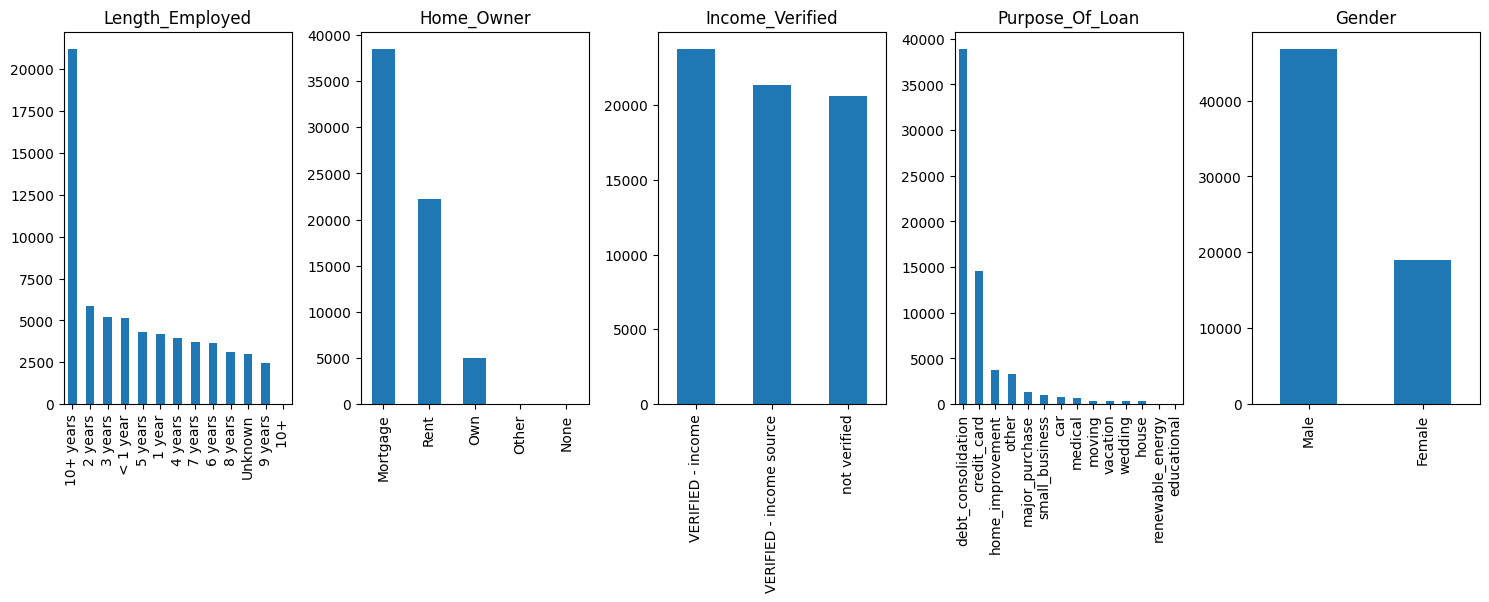

In [ ]:
object_cols = df_pre.select_dtypes(include='object')
data_categorical = object_cols
n_rows = (len(categorical_cols) // 5) + 1
n_cols = min(5, len(categorical_cols))

# Vẽ đồ thị subplot cho từng cột
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

for i, col in enumerate(categorical_cols):
    ax = axes[i // 5, i % 5]  # Lấy axes tương ứng với vị trí của cột
    data_categorical[col].value_counts().plot.bar(ax=ax)
    ax.set_title(col)

# Xóa những subplot không sử dụng
if len(categorical_cols) < (n_rows * n_cols):
    for i in range(len(categorical_cols), n_rows * n_cols):
        fig.delaxes(axes[i // 5, i % 5])

plt.tight_layout()
plt.show()



In [ ]:
Numerical_cols = np.array(numerical_cols).reshape(9, 1)

In [ ]:
Numberic_cols = df_pre.select_dtypes(include='float64')
Numberic_cols

,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
0,68000.0,18.37,0.0,34.197036,9.0,14.0,1.0
1,63000.0,14.93,0.0,17.000000,12.0,24.0,3.0
2,75566.4,15.88,0.0,34.197036,12.0,16.0,3.0
3,56160.0,14.34,3.0,34.197036,16.0,22.0,3.0
4,96000.0,22.17,1.0,34.197036,19.0,30.0,1.0
...,...,...,...,...,...,...,...
65685,115000.0,11.59,2.0,1.000000,19.0,46.0,2.0
65686,78000.0,9.46,2.0,73.000000,10.0,27.0,3.0
65687,225000.0,28.93,0.0,34.197036,26.0,62.0,2.0
65688,45000.0,11.22,1.0,34.197036,8.0,20.0,2.0


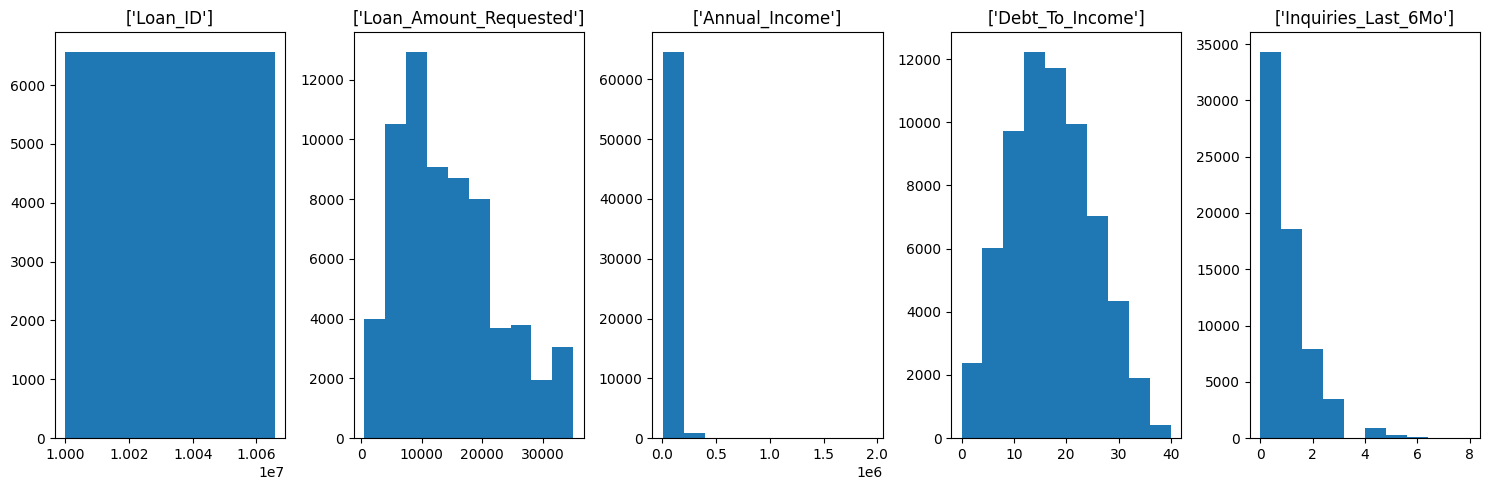

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
for i, col in enumerate(Numerical_cols[:5]):
    axs[i].hist(df_pre[col])
    axs[i].set_title(col)
plt.tight_layout()
plt.show()

<Axes: >

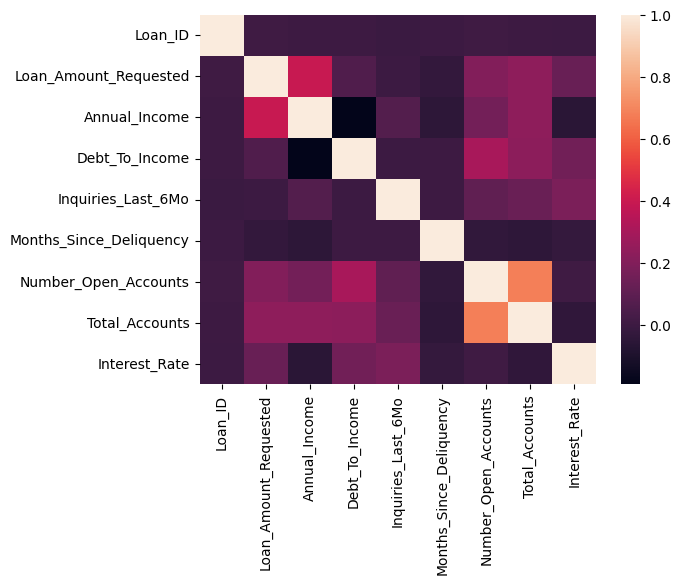

In [ ]:
sns.heatmap(data_visual[numerical_cols].corr())

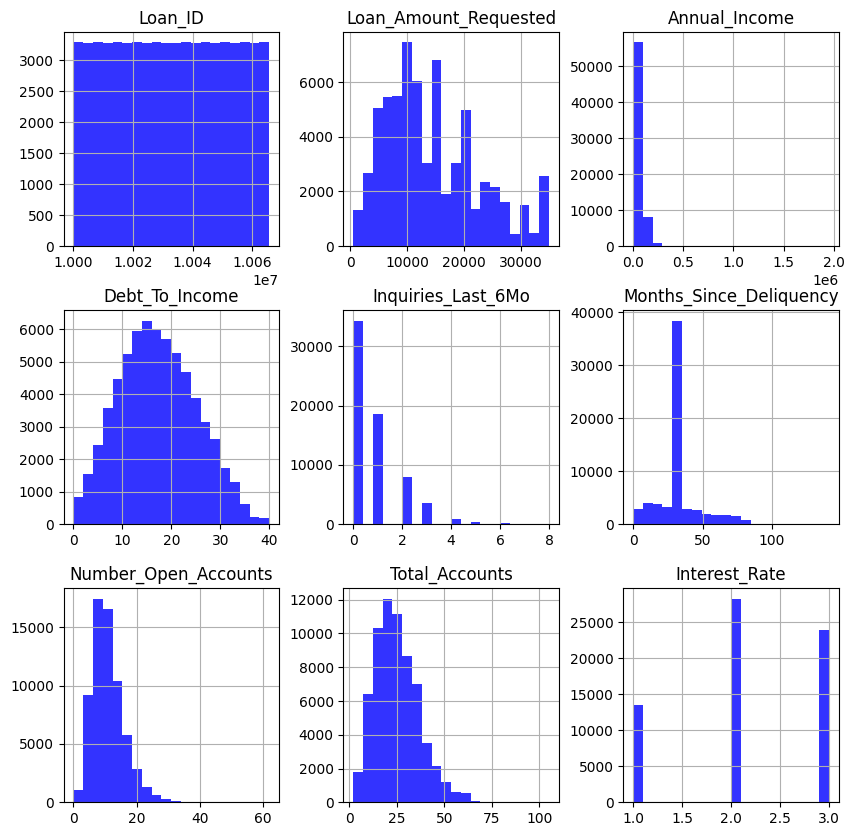

In [ ]:
data_visual.hist(figsize=(10, 10),grid=True,bins=20,alpha=0.8,color='blue')
plt.show()

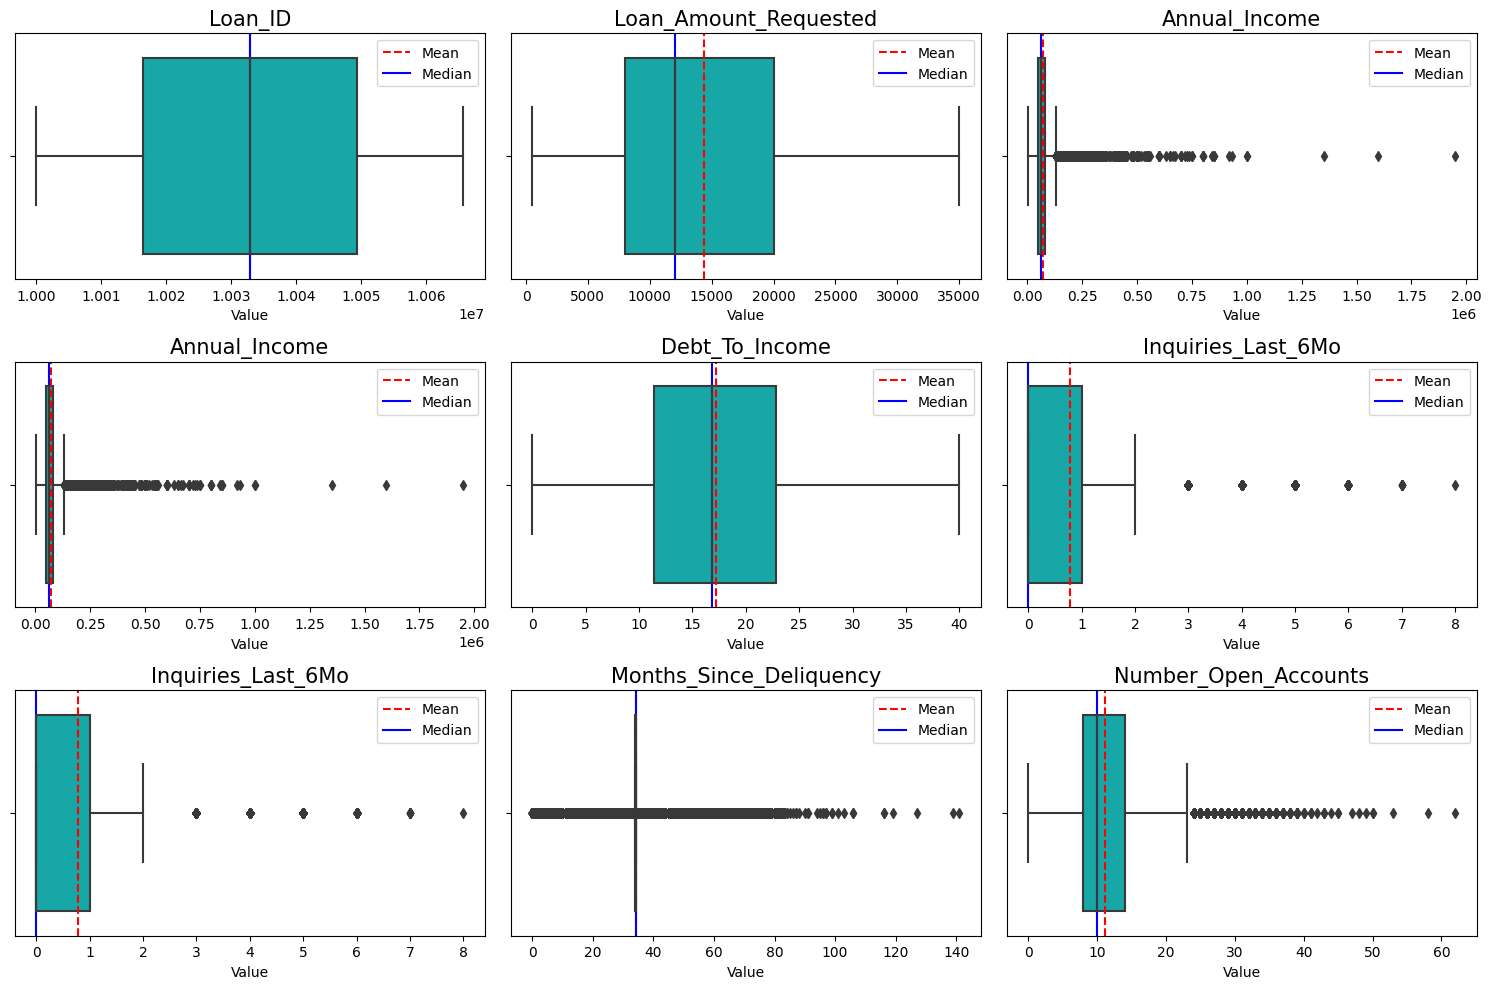

In [ ]:
numeric_cols = data_visual.select_dtypes(include='number').columns
numeric_cols
def boxplot_numerical_features(data_visual, continous_columns):
    l = len(continous_columns)
    n = 3
    row = lambda l, n: int(l/n) if l%n==0 else int(int(l/n)+1)
    m = row(l, n)
    # set position for figure
    fig , ax = plt.subplots(m,n, figsize=(15,10))
    if ( m <= 1):
        for j in range(n):
            index = j
            if index >= len(continous_columns):
                break
            mean = data_visual[continous_columns[index]].describe()['mean']
            median = data_visual[continous_columns[index]].describe()['50%']
            sns.boxplot(x=continous_columns[index], data =data_visual, ax=ax[index], color='c')
            ax[index].axvline(mean, label='Mean', color='r', linestyle='dashed')
            ax[index].axvline(median, label='Median', color='b')
            ax[index].set_title(f"{continous_columns[index]}", fontsize=15)
            ax[index].set_xlabel('Value')
            ax[index].legend()
    else:
        for i in range(m):
            for j in range(n):
                index = 2*i + j
                if index >= len(continous_columns):
                    break
                mean = data_visual[continous_columns[index]].describe()['mean']
                median = data_visual[continous_columns[index]].describe()['50%']
                sns.boxplot(x=continous_columns[index], data =data_visual, ax=ax[i, j], color='c')
                ax[i, j].axvline(mean, label='Mean', color='r', linestyle='dashed')
                ax[i, j].axvline(median, label='Median', color='b')
                ax[i, j].set_title(f"{continous_columns[index]}", fontsize=15)
                ax[i, j].set_xlabel('Value')
                ax[i, j].legend()
    plt.tight_layout()
    plt.show()
boxplot_numerical_features(data_visual, numeric_cols)

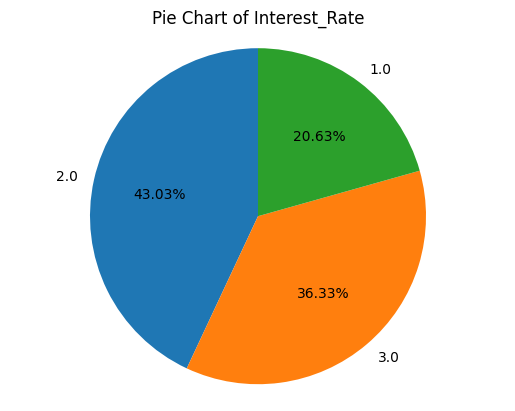

In [ ]:
label_target = df_pre['Interest_Rate'].value_counts().index.to_list()
plt.pie(df_pre['Interest_Rate'].value_counts(), labels=label_target, autopct='%.2f%%', startangle=90)
plt.axis('equal')
plt.title('Pie Chart of Interest_Rate')
plt.show()

##ENCODING

In [ ]:
df_copy = df_pre.copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65690 entries, 0 to 65689
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  65690 non-null  int64  
 1   Loan_Amount_Requested    65690 non-null  int64  
 2   Length_Employed          65690 non-null  object 
 3   Home_Owner               65690 non-null  object 
 4   Annual_Income            65690 non-null  float64
 5   Income_Verified          65689 non-null  object 
 6   Purpose_Of_Loan          65689 non-null  object 
 7   Debt_To_Income           65689 non-null  float64
 8   Inquiries_Last_6Mo       65689 non-null  float64
 9   Months_Since_Deliquency  65690 non-null  float64
 10  Number_Open_Accounts     65689 non-null  float64
 11  Total_Accounts           65689 non-null  float64
 12  Gender                   65689 non-null  object 
 13  Interest_Rate            65689 non-null  float64
dtypes: float64(7), int64(2

In [ ]:
# class distribution
print(df_copy.groupby('Interest_Rate').size())

Interest_Rate
1.0    13554
2.0    28267
3.0    23868
dtype: int64


In [ ]:
df_copy=df_copy.fillna(method='ffill')  #Filling Null values using Forward Fill Method

In [ ]:
display(df_copy.isnull().sum())

Loan_ID                    0
Loan_Amount_Requested      0
Length_Employed            0
Home_Owner                 0
Annual_Income              0
Income_Verified            0
Purpose_Of_Loan            0
Debt_To_Income             0
Inquiries_Last_6Mo         0
Months_Since_Deliquency    0
Number_Open_Accounts       0
Total_Accounts             0
Gender                     0
Interest_Rate              0
dtype: int64

In [ ]:
dataset_train_encoded = df_copy
encoder = LabelEncoder()
dataset_train_encoded[categorical_cols] = dataset_train_encoded[categorical_cols].apply(encoder.fit_transform)
dataset_train_encoded.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,7000,11,4,68000.0,2,0,18.37,0.0,34.197036,9.0,14.0,0,1.0
1,10000002,30000,5,0,63000.0,0,2,14.93,0.0,17.000000,12.0,24.0,0,3.0
2,10000003,24725,8,0,75566.4,1,2,15.88,0.0,34.197036,12.0,16.0,1,3.0
3,10000004,16000,11,0,56160.0,1,2,14.34,3.0,34.197036,16.0,22.0,1,3.0
4,10000005,17000,9,3,96000.0,1,2,22.17,1.0,34.197036,19.0,30.0,0,1.0


In [ ]:
print(encoder.classes_)

['Female' 'Male']


In [ ]:
corr=dataset_train_encoded.corr()["Interest_Rate"].abs().sort_values(ascending=False)
corr

Interest_Rate              1.000000
Income_Verified            0.207235
Inquiries_Last_6Mo         0.182783
Debt_To_Income             0.155578
Loan_Amount_Requested      0.128134
Purpose_Of_Loan            0.107795
Annual_Income              0.060043
Home_Owner                 0.057558
Total_Accounts             0.039350
Months_Since_Deliquency    0.027463
Number_Open_Accounts       0.008676
Loan_ID                    0.004935
Gender                     0.001840
Length_Employed            0.001554
Name: Interest_Rate, dtype: float64

###REMOVE OUTLIER

In [ ]:
def remove_outlier(data, feature, lower_bound, upper_bound):
    Q1 = data[feature].quantile(lower_bound) # or Q1 = np.percentile(df['column'], 0.25)
    Q3 = data[feature].quantile(upper_bound)
    IQR = Q3 - Q1
    lower_extreme = Q1 - 1.5*IQR
    upper_extreme = Q3 + 1.5*IQR

    outliers = data[(data[feature] < lower_extreme) | (data[feature] > upper_extreme)]
    percent_outliers = len(outliers) / len(data) * 100
    print('Percent of outlier in',feature,':',percent_outliers)

    data = data.drop(outliers.index)

    return data

def imputate_outlier(data, feature, lower_bound, upper_bound):
    Q1 = data[feature].quantile(lower_bound) # or Q1 = np.percentile(df['column'], lower_bound)
    Q3 = data[feature].quantile(upper_bound)
    IQR = Q3 - Q1
    lower_extreme = Q1 - 1.5*IQR
    upper_extreme = Q3 + 1.5*IQR

    outliers = data[(data[feature] < lower_extreme) | (data[feature] > upper_extreme)]
    percent_outliers = len(outliers) / len(data) * 100
    print('Percent of outlier in',feature,':',percent_outliers)

    mean = data[feature].median() # median = df['column'].median()
    data.loc[data[feature] < lower_extreme, feature] = Q1 # or mean
    data.loc[data[feature] > upper_extreme, feature] = Q3 # or mean

    return data

In [ ]:
dataset_train_encoded = remove_outlier(dataset_train_encoded, 'Debt_To_Income', 0.25, 0.75)

dataset_train_encoded = remove_outlier(dataset_train_encoded, 'Inquiries_Last_6Mo', 0.25, 0.75)

dataset_train_encoded = remove_outlier(dataset_train_encoded, 'Months_Since_Deliquency', 0.25, 0.75)

dataset_train_encoded = remove_outlier(dataset_train_encoded, 'Number_Open_Accounts', 0.25, 0.75)

Percent of outlier in Debt_To_Income : 0.0
Percent of outlier in Inquiries_Last_6Mo : 0.0
Percent of outlier in Months_Since_Deliquency : 1.1452144198503833
Percent of outlier in Number_Open_Accounts : 0.0


In [ ]:
#split dataset in features and target variable
feature_cols = ['Loan_Amount_Requested','Income_Verified',
'Home_Owner',
'Purpose_Of_Loan',
'Inquiries_Last_6Mo','Months_Since_Deliquency',
'Total_Accounts','Number_Open_Accounts','Length_Employed'
]
X = dataset_train_encoded[feature_cols] # Features
y = dataset_train_encoded.Interest_Rate # Target variable

#MODELING

##Compare and train_test model

In [ ]:
pip install imbalanced-learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import PowerTransformer
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

def evaluate_model(y_true, y_pred):
    print("accuracy", accuracy_score(y_true, y_pred))
    print("precision", precision_score(y_true, y_pred, average = 'weighted'))
    print("recall", recall_score(y_true, y_pred, average = 'weighted'))
    print("F1", f1_score(y_true, y_pred, average = 'weighted'))
    report = classification_report(y_true, y_pred)
    print("Classification Report\n",report)

    cm = confusion_matrix(y_true,y_pred)

In [ ]:
# Applying SMOTEN Over Sampling Strategy
from imblearn.over_sampling import SMOTEN
oversampler = SMOTEN()
X_ov,y_ov = oversampler.fit_resample(X,y)
print('The dataset before oversampling: ',X.shape,y.shape)
print('The dataset after oversampling: ',X_ov.shape,y_ov.shape)

The dataset before oversampling:  (32111, 9) (32111,)
The dataset after oversampling:  (40893, 9) (40893,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ov,y_ov, test_size=0.3, random_state=42)

##Decision tree

In [ ]:
#DECISION TREE
dt=DecisionTreeClassifier(min_samples_split=100,random_state = 1)
dt=dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, dt_pred)*100)

Accuracy: 48.24915457619723


In [ ]:
evaluate_model(dt_pred, y_test)

accuracy 0.4824915457619723
precision 0.49459012101914784
recall 0.4824915457619723
F1 0.48696588733231105
Classification Report
               precision    recall  f1-score   support

         1.0       0.56      0.50      0.53      6717
         2.0       0.34      0.41      0.37      5052
         3.0       0.55      0.52      0.53      6565

    accuracy                           0.48     18334
   macro avg       0.48      0.48      0.48     18334
weighted avg       0.49      0.48      0.49     18334



##Random Forest Classifier

In [ ]:
# Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=1000,max_depth=25)
rfc=rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, rfc_pred)*100)

Accuracy: 54.16166684847824


In [ ]:
evaluate_model(rfc_pred, y_test)

accuracy 0.5416166684847824
precision 0.5470550967605718
recall 0.5416166684847824
F1 0.5439175913314899
Classification Report
               precision    recall  f1-score   support

         1.0       0.62      0.59      0.61      6311
         2.0       0.41      0.45      0.43      5582
         3.0       0.60      0.57      0.58      6441

    accuracy                           0.54     18334
   macro avg       0.54      0.54      0.54     18334
weighted avg       0.55      0.54      0.54     18334



##SVM

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# X_train, X_test, y_train, y_test là dữ liệu huấn luyện và kiểm tra

# Tạo pipeline gồm các bước tiền xử lý và mô hình SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Tiêu chuẩn hóa dữ liệu
    ('svm', SVC(kernel='rbf'))  # Mô hình SVM với kernel tuyến tính
])

# Huấn luyện mô hình trên tập huấn luyện
pipeline.fit(X_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
y_pred = pipeline.predict(X_test)

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4911150961851973


##MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an MLP classifier with desired parameters
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Evaluate the model
accuracy = mlp.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.4917093923857314


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


##Catboost

In [ ]:
!pip install -U catboost
!pip install -U xlrd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 10.9 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
catboost = CatBoostClassifier()

# Train the classifier
catboost.fit(X_train, y_train)

# Make predictions on the test set
cat_pred = catboost.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, cat_pred)
print("Accuracy:", accuracy)

Learning rate set to 0.095833
0:	learn: 1.0871187	total: 18.7ms	remaining: 18.6s
1:	learn: 1.0771208	total: 36.9ms	remaining: 18.4s
2:	learn: 1.0687744	total: 55.4ms	remaining: 18.4s
3:	learn: 1.0613208	total: 73.6ms	remaining: 18.3s
4:	learn: 1.0552783	total: 92.1ms	remaining: 18.3s
5:	learn: 1.0501258	total: 112ms	remaining: 18.6s
6:	learn: 1.0455044	total: 131ms	remaining: 18.6s
7:	learn: 1.0416907	total: 150ms	remaining: 18.7s
8:	learn: 1.0378974	total: 170ms	remaining: 18.7s
9:	learn: 1.0343935	total: 188ms	remaining: 18.6s
10:	learn: 1.0313877	total: 211ms	remaining: 18.9s
11:	learn: 1.0286400	total: 228ms	remaining: 18.8s
12:	learn: 1.0262713	total: 258ms	remaining: 19.6s
13:	learn: 1.0240365	total: 285ms	remaining: 20.1s
14:	learn: 1.0218801	total: 313ms	remaining: 20.6s
15:	learn: 1.0203823	total: 339ms	remaining: 20.9s
16:	learn: 1.0186008	total: 358ms	remaining: 20.7s
17:	learn: 1.0169697	total: 376ms	remaining: 20.5s
18:	learn: 1.0152046	total: 395ms	remaining: 20.4s
19:	le

In [ ]:
evaluate_model(cat_pred, y_test)

accuracy 0.5232355187084106
precision 0.5371536974376885
recall 0.5232355187084106
F1 0.5284397166122449
Classification Report
               precision    recall  f1-score   support

         1.0       0.60      0.55      0.58      6654
         2.0       0.36      0.44      0.40      5023
         3.0       0.60      0.56      0.58      6657

    accuracy                           0.52     18334
   macro avg       0.52      0.52      0.52     18334
weighted avg       0.54      0.52      0.53     18334



##Naive_bayes(GaussianNB)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#Model NAIVE_BAYES
naive_bayes = GaussianNB()

# Train the classifier
naive_bayes.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4685284171484673


##Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Root Mean Squared Error: 0.7641800108457592
R-squared: 0.12929372503399694


##KNN

In [ ]:
#KNN Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a KNN classifier with k=3
model = KNeighborsClassifier(n_neighbors=3)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.4677208999021846


##Lightgbm

In [ ]:
import lightgbm as lgb

# Huấn luyện mô hình trên dữ liệu
model = lgb.LGBMClassifier(num_leaves=31, learning_rate=0.05)

model.fit(X_train, y_train)

# Dự đoán nhãn cho dữ liệu kiểm tra
y_pred = model.predict(X_test)

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5142647538311054


##Logictis Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#MODEL LOGICTICS
model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4439191392239974


#Conslution

- I think main metrics is accuracy because because it's preferable to have a model that does not miss any Interest_rate. This data's really not good, it miss a large amount of data. And when i train model the accuracy just only fluctuates about 44%->54% for all model
- So i think use model MLP in data is fine
- Random forest is the best choice in data